In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
from scipy.interpolate import make_interp_spline
import numpy as np
plt.rcParams["figure.figsize"] = [15, 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams.update({'font.size': 40})
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['figure.titlesize'] = 'small'
class PLOT:
  def __init__(self):
    pass
  def iterator(self, DATA):
    self.inputs, self.classes = next(iter(DATA))
    return self.inputs, self.classes

  def showdata(self, DATA, title):
    inp = DATA.clone().detach()
    inp = inp.numpy().transpose((1, 2, 0))
    inp = 0.25 * inp + 0.5
    inp = np.clip(inp, 0, 1)
    plt.rcParams['figure.figsize'] =[15,15]
    plt.imshow(inp)
    plt.title(title)
    plt.show()
  

  def plots(self, TRAIN_LOSS, VAL_LOSS,fname, EPOCHS=50):
    fig = plt.figure()
    ax=plt.subplot()
    plt.rcParams['legend.fontsize'] = 30
    plt.rcParams['axes.labelsize'] = 30
    plt.rcParams['xtick.labelsize'] = 30
    plt.rcParams['ytick.labelsize'] = 30
    plt.rcParams['figure.figsize'] =[20,15]
    fig.patch.set_facecolor('white')
    
    x = [i for i in range(EPOCHS)]
    
    Trainloss_Spline = make_interp_spline(x,TRAIN_LOSS)
    Valloss_Spline = make_interp_spline(x,VAL_LOSS)
    X_ = np.linspace(0, EPOCHS, EPOCHS)
    TRAIN_LOSS_ = Trainloss_Spline(X_)
    VAL_LOSS_ = Valloss_Spline(X_)
    
    plt.plot(TRAIN_LOSS_, color=(0, 114/255, 189/255), linewidth=5)
    plt.plot(VAL_LOSS_,  linestyle='--', color=(165/255, 27/255, 54/255),linewidth=5)
    plt.legend(["Training Loss", "Validation Loss"], loc ="best")
    ax.set_ylabel('Mean Squared Error')
    ax.set_xlabel('Epochs')
    plt.xticks(np.arange(0, EPOCHS, 50))
    #ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    #ax.xaxis.set_major_formatter(plt.MaxNLocator(3))
    
    #plt.xticks(np.arange(1, EPOCHS, step=1)) 
    plt.show()
    #plt.grid()
    fig.savefig(str(item)+'.eps', dpi=1000,format='eps',transparent=False)
    
  
  def plot_confusion_matrix(self, CM, classes, save_path, title_name):
    fig = plt.figure()
    ax = plt.subplot()
    sns.heatmap(CM, annot=True, fmt='g', ax=ax,)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(str(title_name),fontsize = 32) 
    ax.xaxis.set_ticklabels(list(classes)) 
    ax.yaxis.set_ticklabels(list(classes))
    fig.savefig(save_path, dpi=300)

In [102]:
plot= PLOT()

In [103]:
tr = dict()
val = dict()
test = dict()
for i in range(1,13):
    if i == 11:
        tr[15] = pd.read_csv('TR_LOSS_'+str(15)+'.csv', index_col=0)
        val[15] = pd.read_csv('VAL_LOSS_'+str(15)+'.csv', index_col=0)
        test[15] = pd.read_csv('TEST_LOSS_'+str(15)+'.csv', index_col=0) 
    elif i == 12:
        tr[20] = pd.read_csv('TR_LOSS_'+str(20)+'.csv', index_col=0)
        val[20] = pd.read_csv('VAL_LOSS_'+str(20)+'.csv', index_col=0)
        test[20] = pd.read_csv('TEST_LOSS_'+str(20)+'.csv', index_col=0)
    else:
        tr[i] = pd.read_csv('TR_LOSS_'+str(i)+'.csv', index_col=0)
        val[i] = pd.read_csv('VAL_LOSS_'+str(i)+'.csv', index_col=0)
        test[i] = pd.read_csv('TEST_LOSS_'+str(i)+'.csv', index_col=0)

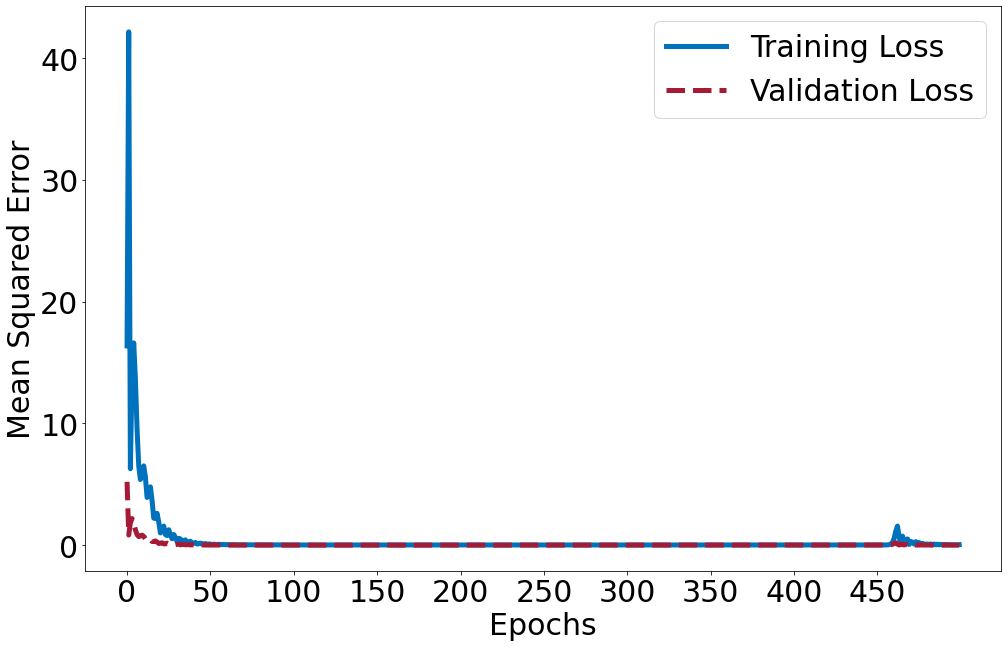

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


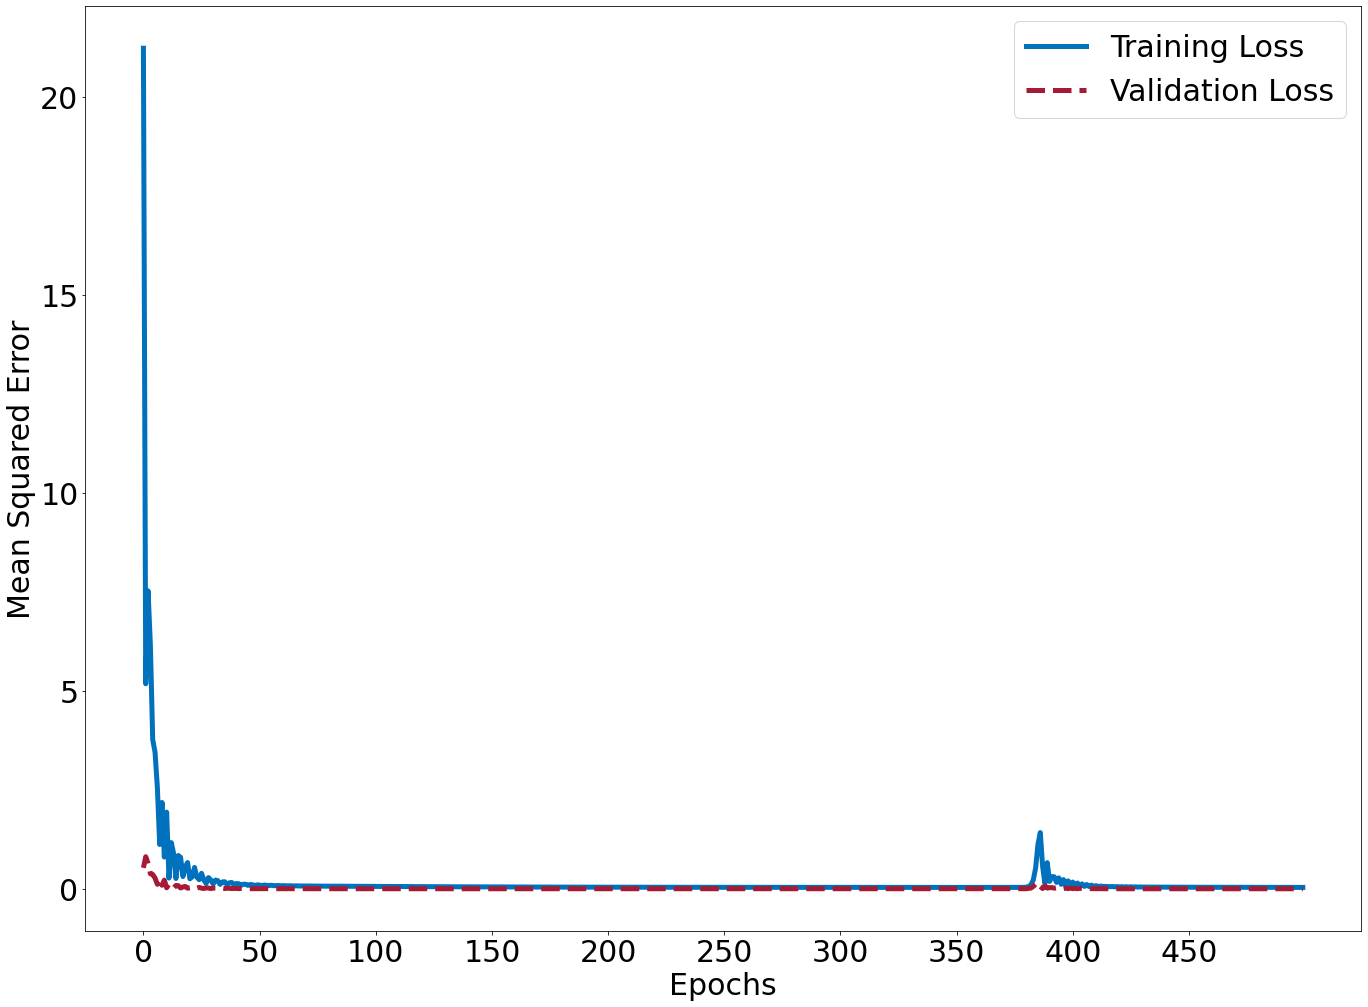

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


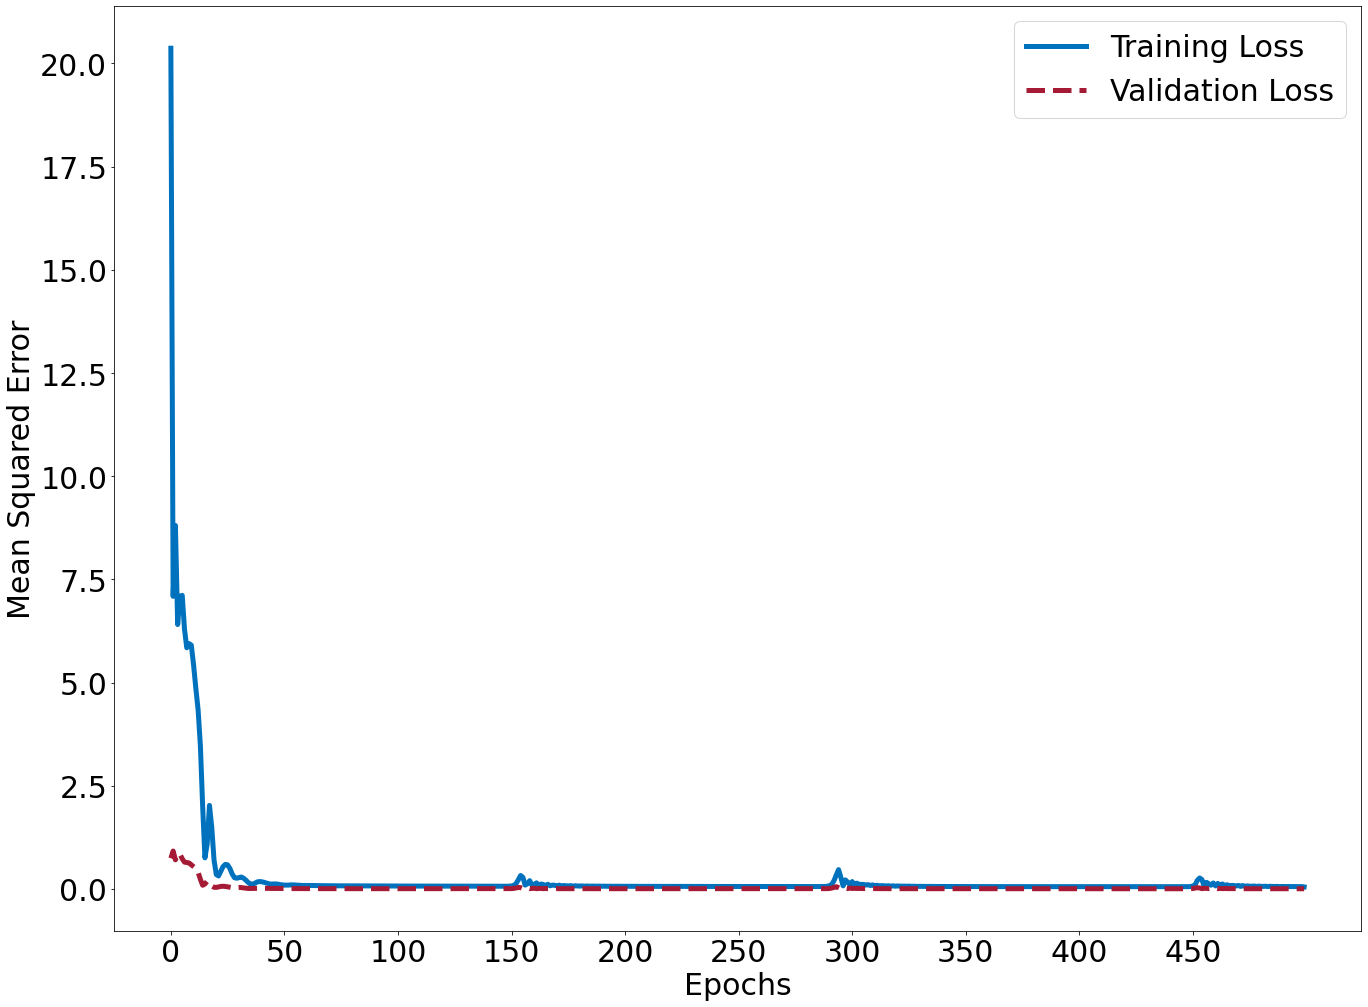

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


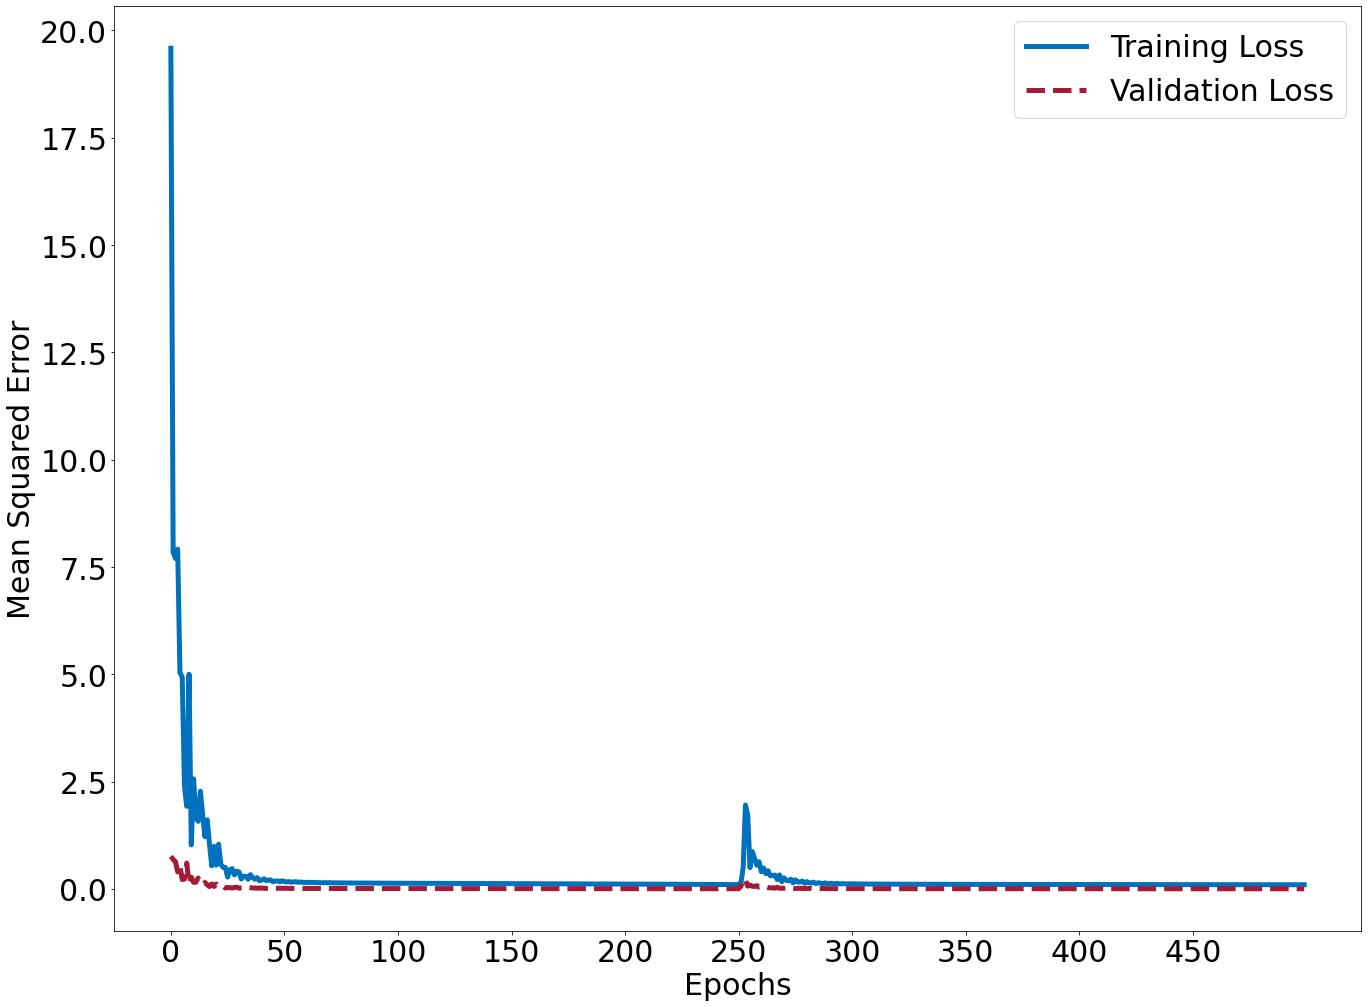

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


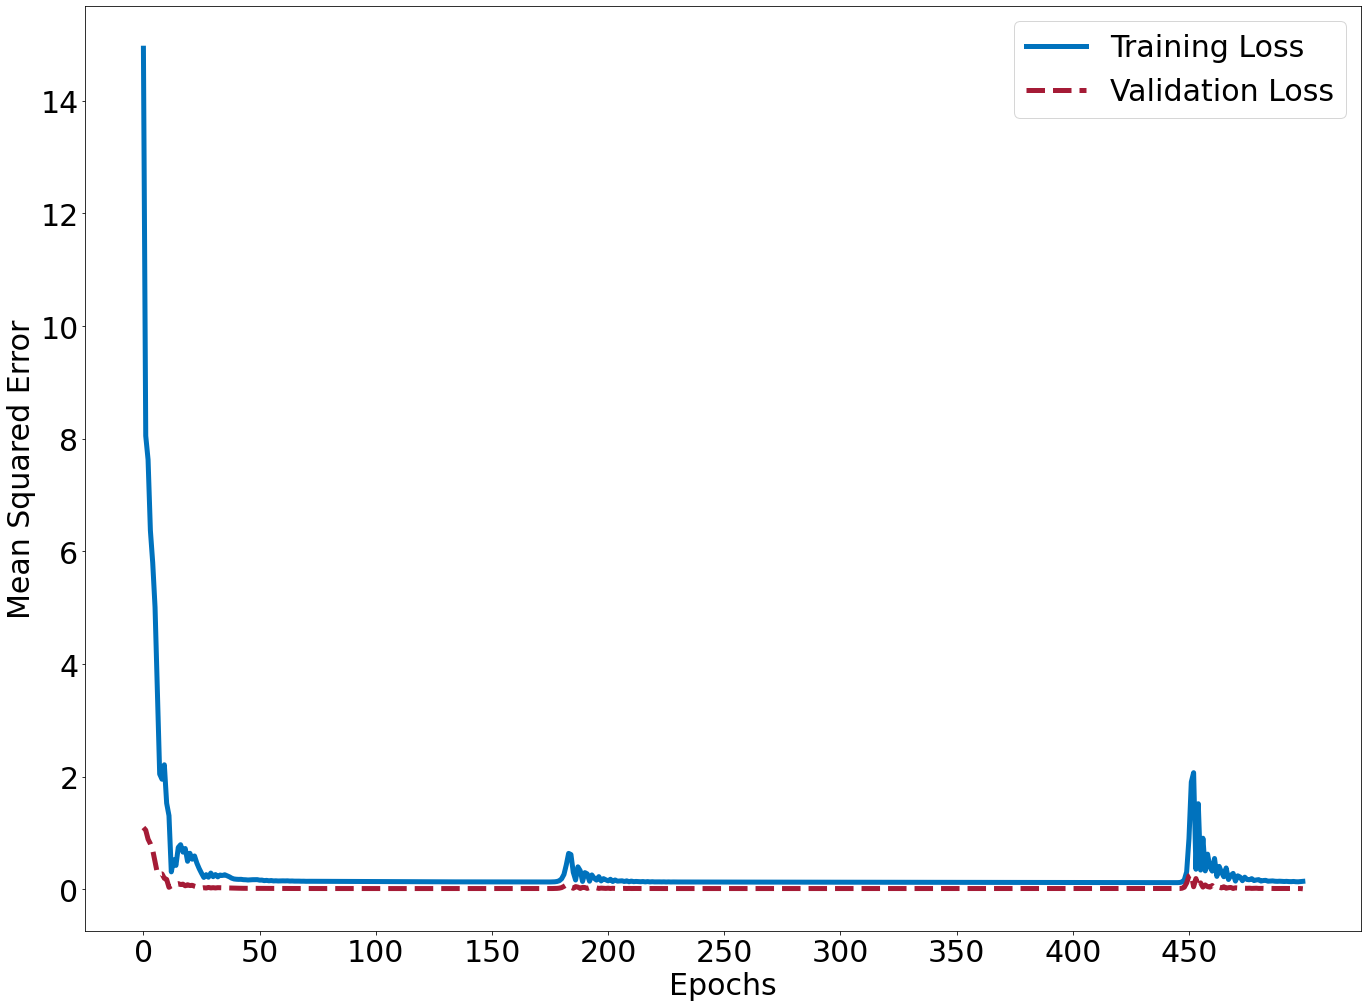

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


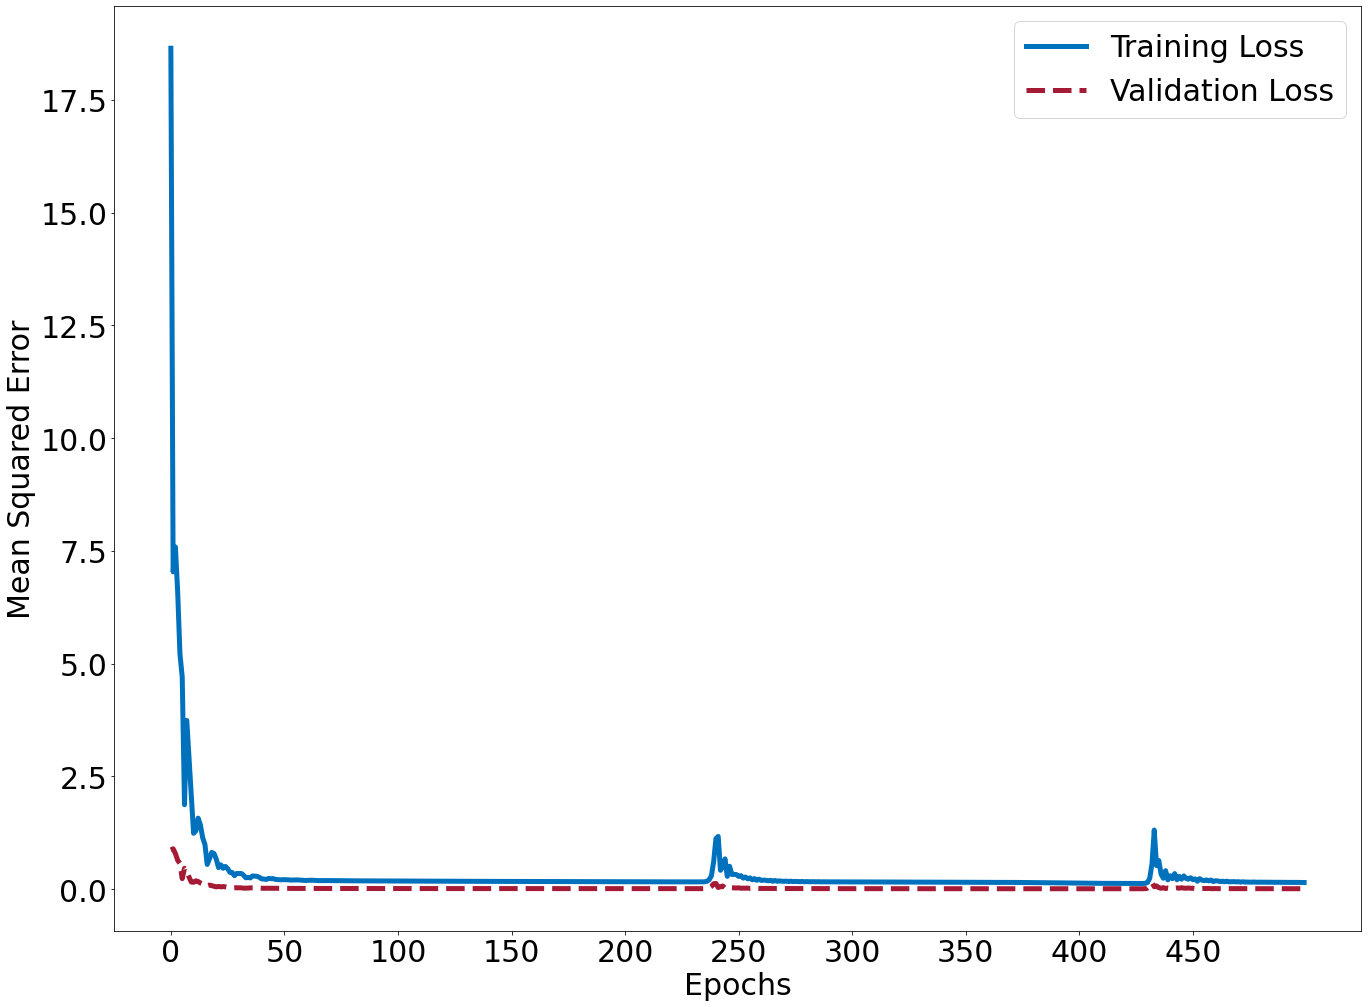

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


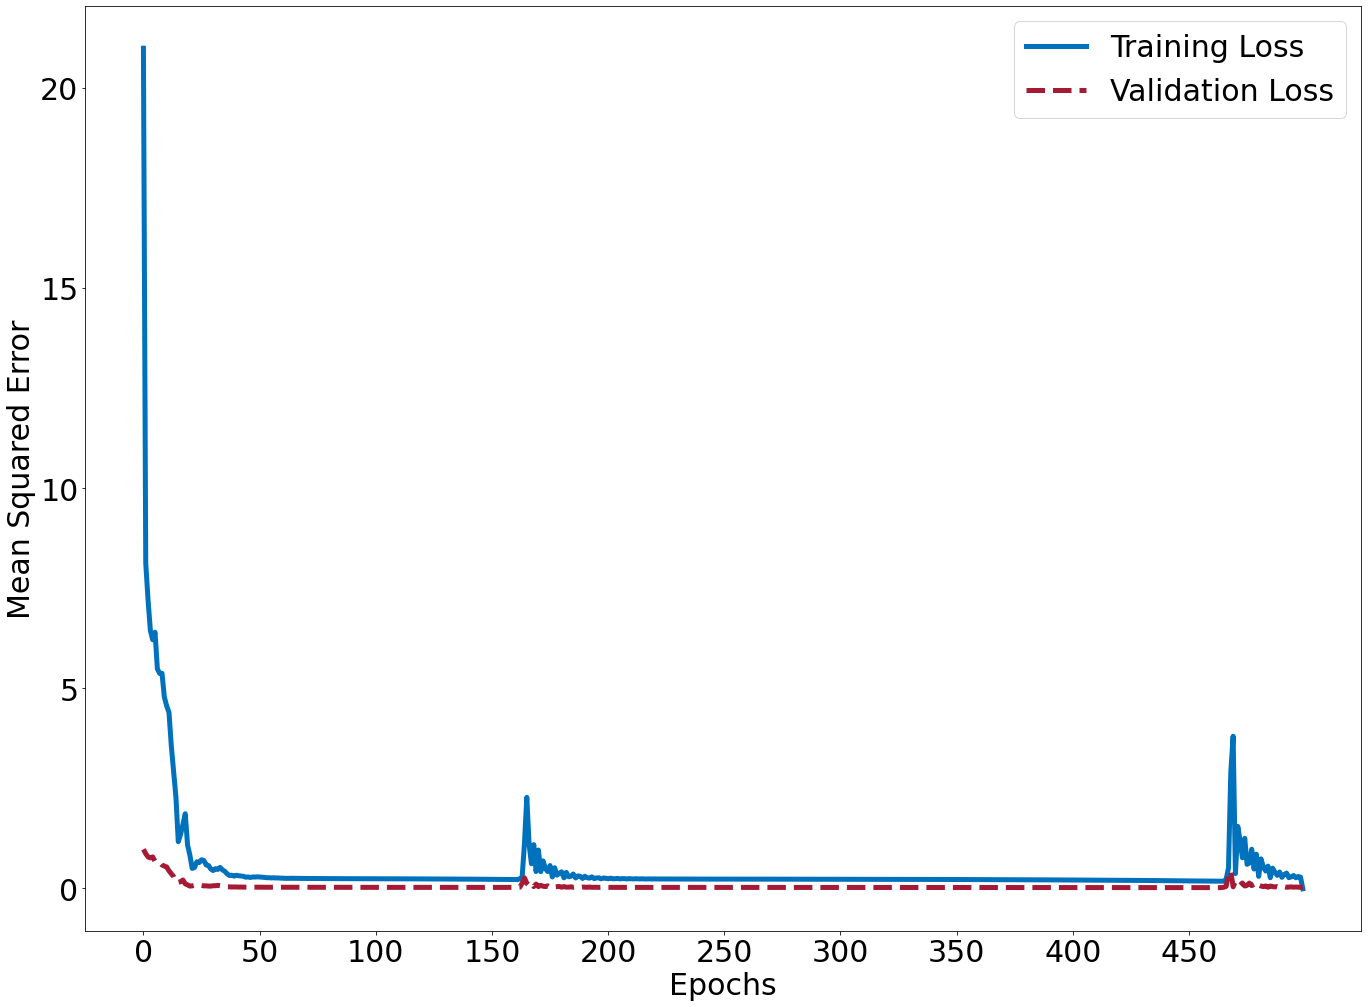

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


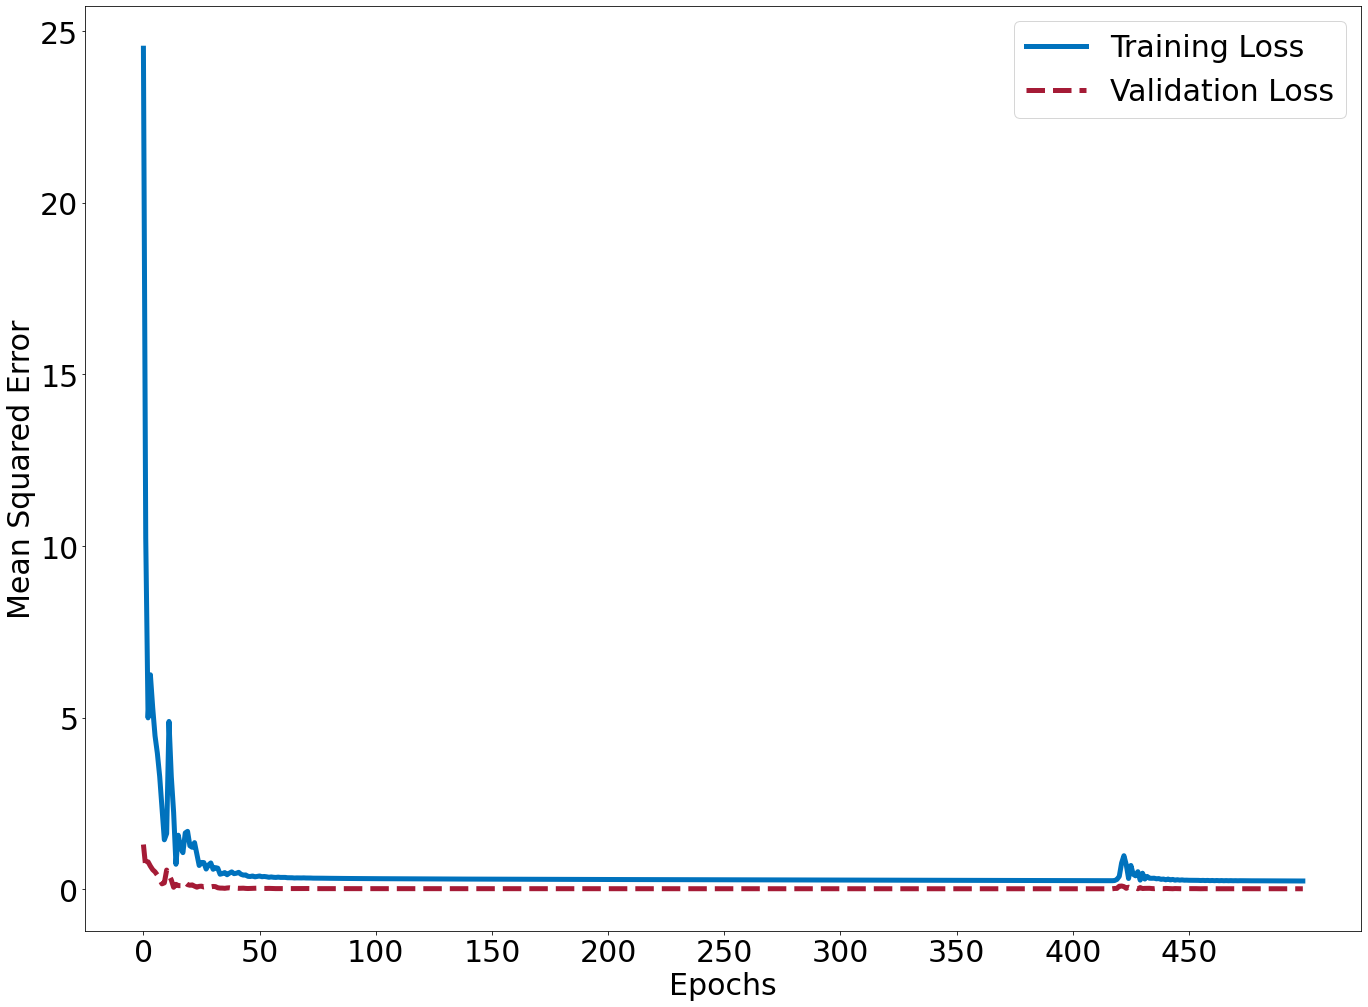

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


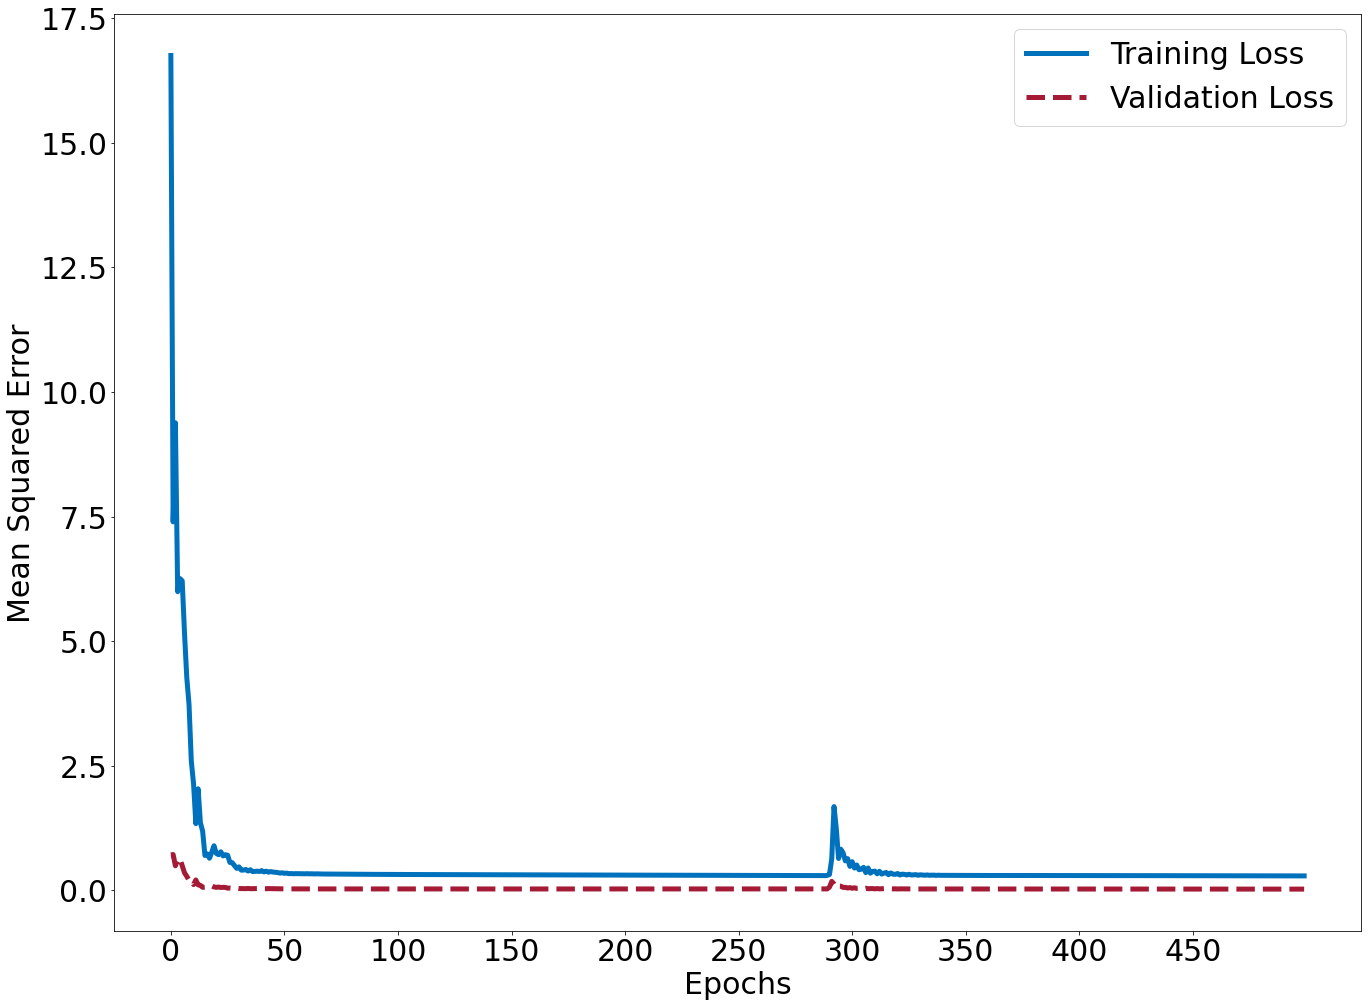

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


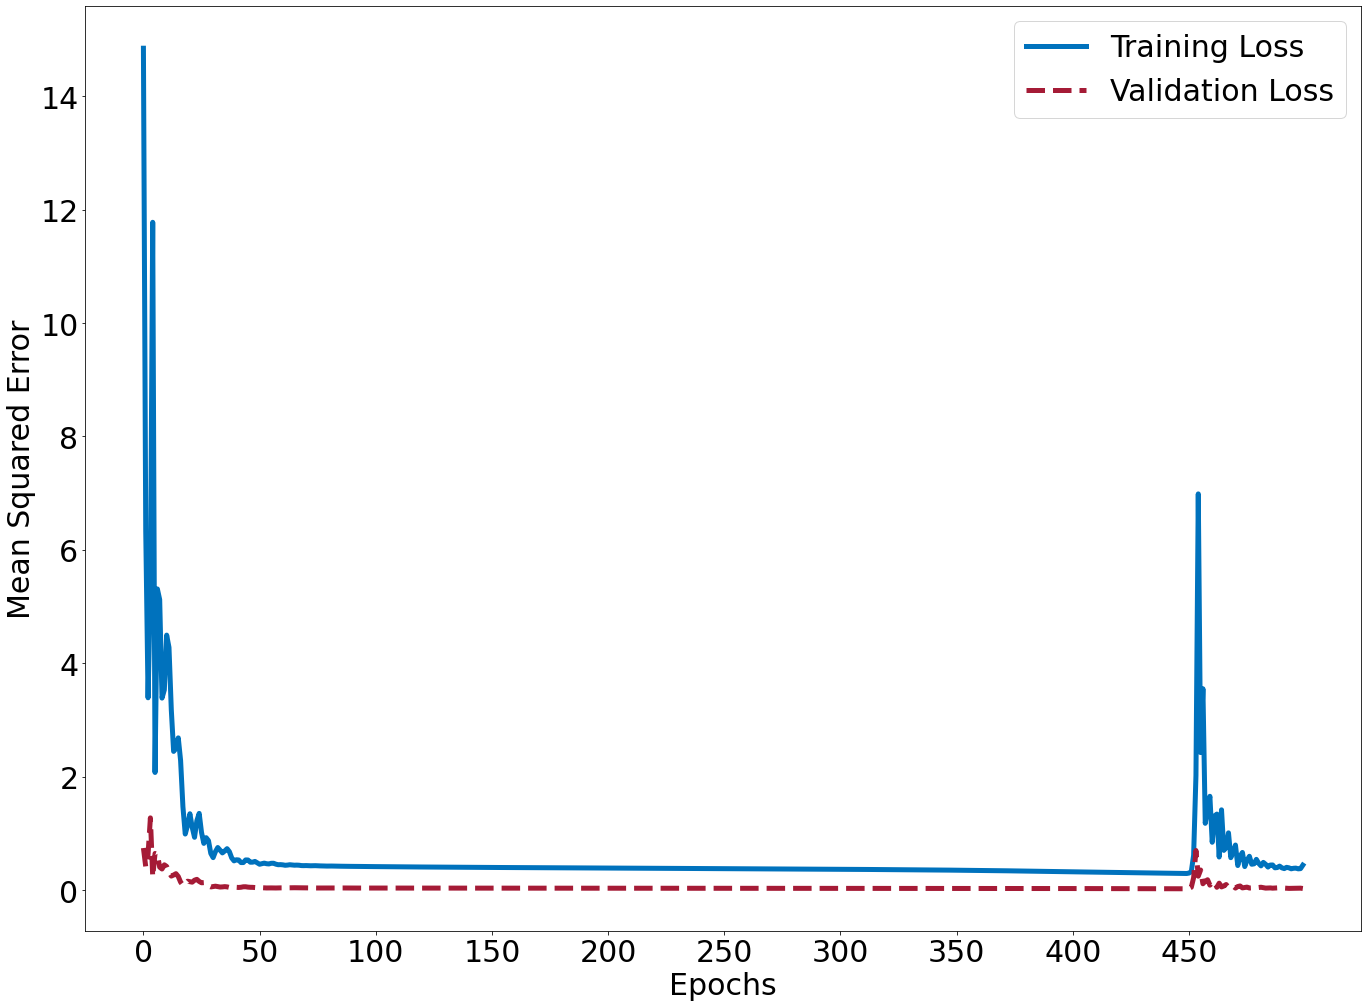

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


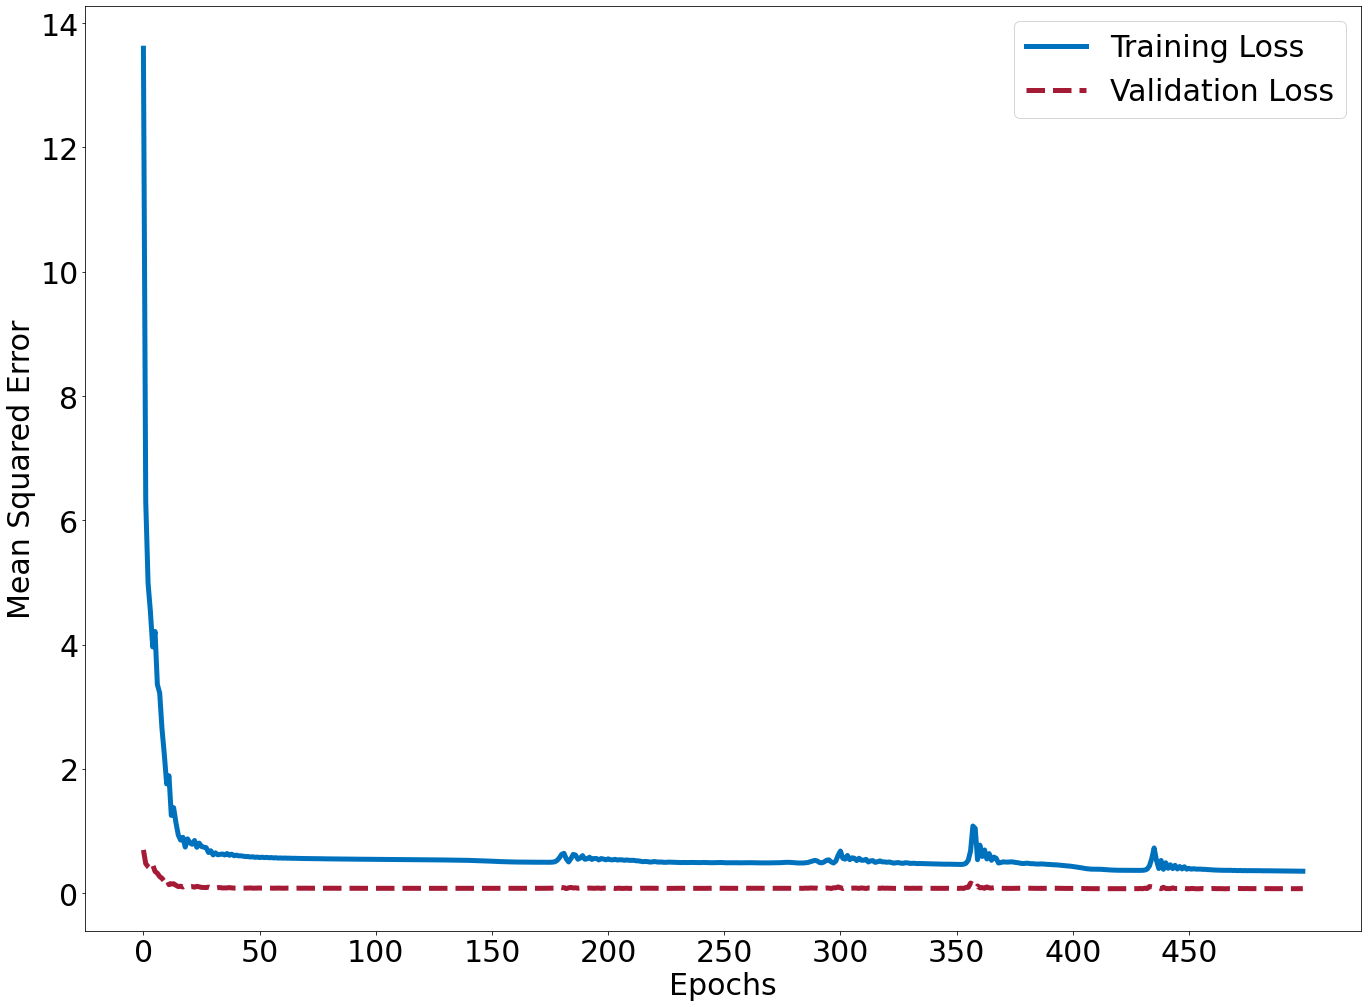

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


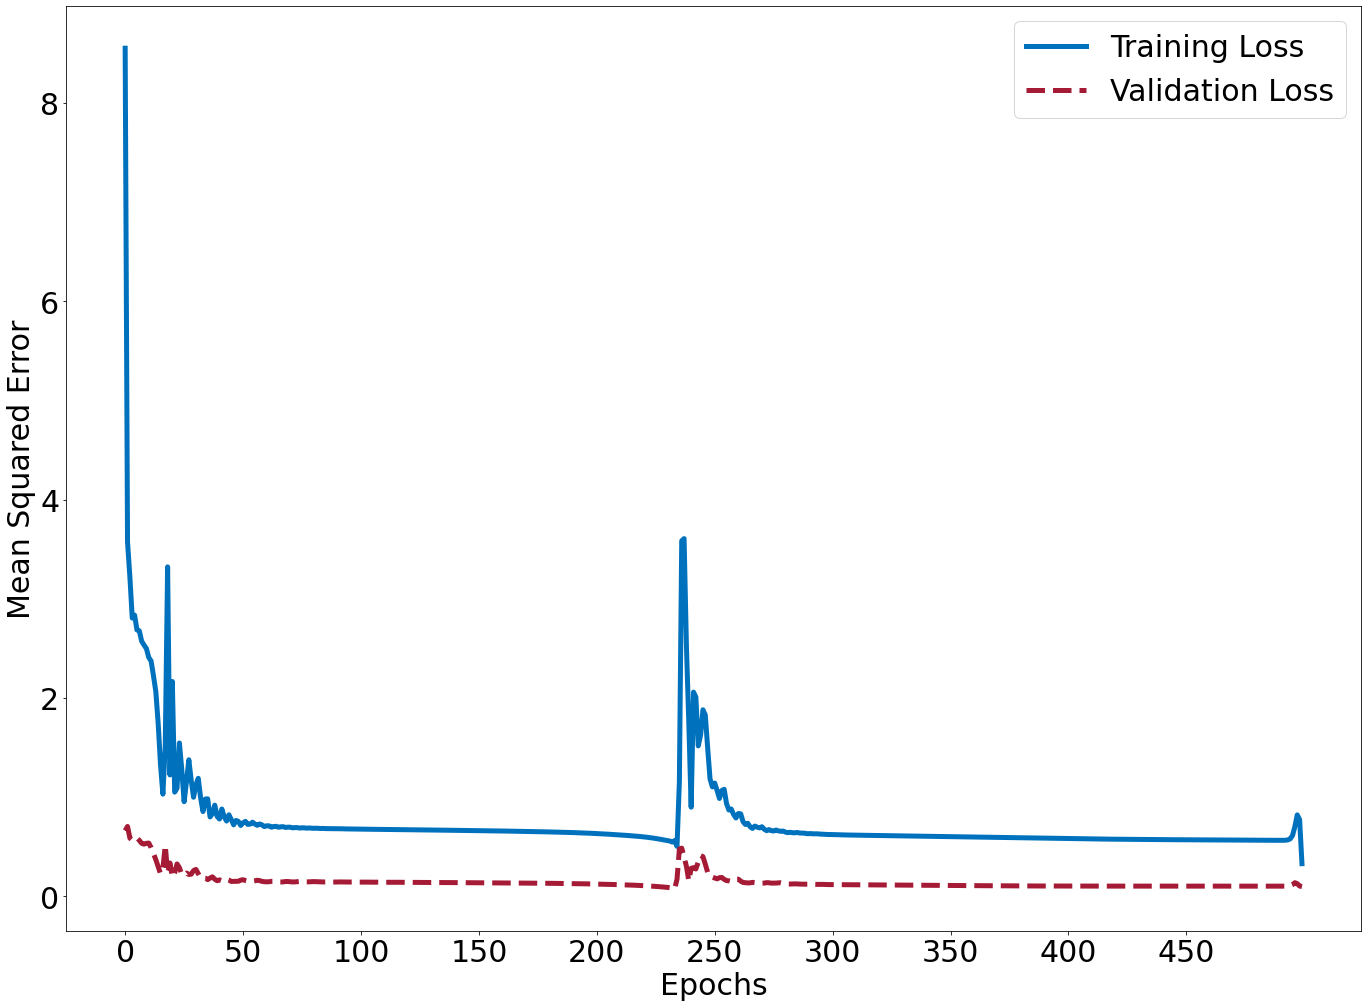

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [104]:
for i,item in enumerate(tr.keys()):
    plot.plots(tr[item],val[item], fname=item,EPOCHS=500)

In [108]:

Y_axis = list()


In [109]:
X_axis = list(tr.keys())
Y_tr= []
for i, (key, value) in enumerate(tr.items()):
    Y_tr.append(value.min())

In [110]:
X_axis = list(val.keys())
Y_val= []
for i, (key, value) in enumerate(val.items()):
    Y_val.append(value.min())

In [111]:
X_axis = list(test.keys())
Y_test= []
for i, (key, value) in enumerate(test.items()):
    Y_test.append(value.min())

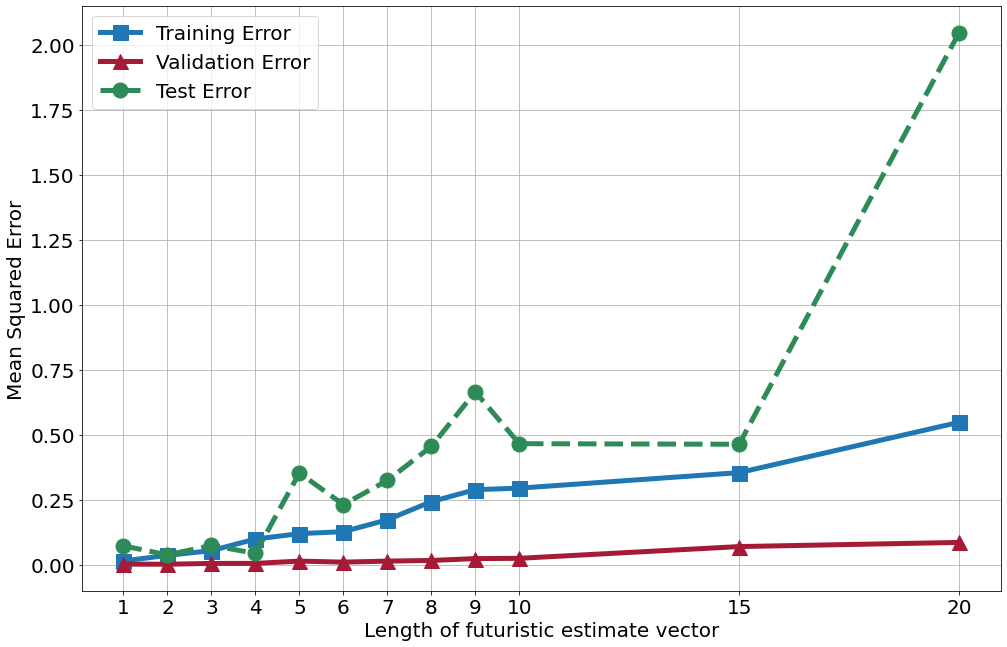

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [135]:
fig = plt.figure()
ax=plt.subplot()
plt.plot(X_axis,Y_tr, color='tab:blue', marker='s', markersize=15,linewidth=5, linestyle='-')
plt.plot(X_axis,Y_val, color=(165/255, 27/255, 54/255), marker='^', markersize=15,linewidth=5, linestyle='-')
plt.plot(X_axis,Y_test, color='seagreen', marker='o', markersize=15,linewidth=5, linestyle='--')
plt.legend(["Training Error", "Validation Error", "Test Error"], loc ="best")
ax.set_ylabel('Mean Squared Error')
ax.set_xlabel('Length of futuristic estimate vector')

#plt.scatter(X_axis,Y_tr,marker='s',color='firebrick', markersize=12)
#plt.plot(X_axis,Y_val,'tab:blue', linewidth=5)
#plt.scatter(X_axis,Y_val,color='tab:blue', marker='o', linewidth=10)

fig.patch.set_facecolor('white')
#plt.plot(X_axis,Y_test)
plt.xticks(X_axis)
plt.grid()
plt.show()
fig.savefig('losss.eps', dpi=1000, format='eps')
